In [1]:
%matplotlib inline
from PIL import Image
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import os
import itertools

## Create pairs of filenames and truth values from training data

In [2]:
fileNames = []
for file in os.listdir("data/train_1"):
    if file.endswith(".jpg"):
        fileNames.append(file)

In [45]:
## from itertools documentation to create tupples
def product(*args, repeat=1):
    # product('ABCD', 'xy') --> Ax Ay Bx By Cx Cy Dx Dy
    # product(range(2), repeat=3) --> 000 001 010 011 100 101 110 111
    pools = [tuple(pool) for pool in args] * repeat
    result = [[]]
    for pool in pools:
        result = [x+[y] for x in result for y in pool]
    for prod in result:
        yield tuple(prod)
def permutations(iterable, r=None):
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield tuple(pool[i] for i in indices)
def combinations(iterable, r):
    pool = tuple(iterable)
    n = len(pool)
    for indices in permutations(range(n), r):
        if sorted(indices) == list(indices):
            yield tuple(pool[i] for i in indices)

def isSameArtist(image1,image2,trainInfo):
    artist1 = trainInfo[trainInfo['filename'] == image1]['artist']
    artist2 = trainInfo[trainInfo['filename'] == image2]['artist']
    return artist1.iloc[0] == artist2.iloc[0]


In [47]:
trainInputs = pd.DataFrame(list(combinations(fileNames,2)),columns=['image1','image2'])
trainInfo = pd.read_csv('data/train_info.csv')
print([isSameArtist(x[0],x[1],trainInfo) for x in trainInputs.values])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

## Loading an Image

In [124]:
filePair = '10.jpg'
jpgfile = Image.open("data/train_1/" + fileName)

In [110]:
print(jpgfile.getbands())

('R', 'G', 'B')


In [111]:
imageDF = pd.DataFrame(list(jpgfile.getdata()),columns=['red','green','blue'])

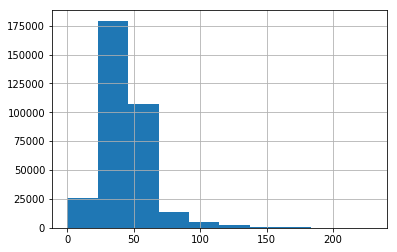

In [112]:
imageDF['blue'].hist()

## Generating RGB Features

In [113]:
imgFeatures = pd.concat([imageDF['red'],imageDF['green'],imageDF['blue']])

In [115]:
dataInfo = pd.read_csv('data/all_data_info.csv')
pixelsX = dataInfo[dataInfo['new_filename'] == fileName]['pixelsx'] # pixelsx and pixelsy could also be features
pixelsY = dataInfo[dataInfo['new_filename'] == fileName]['pixelsy'] # pixelsx and pixelsy could also be features

In [116]:
imgFeatures = imgFeatures.append(pixelsX)
imgFeatures = imgFeatures.append(pixelsY)

## Creating and training the model

In [117]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)